 # Guy William Osborn

# Part A: Introduction - My Research Interest

My research interest is to discover how productivity changes in specific countries and if selected variables have a significant impact. In my preliminary analysis, I assume that the variables: years, annual hours worked, human capital index will have a positive correlation with productivity.
The countries selected for research include: 
- Canada (CAN)
- Australia (AUS)
- France (FRA)
- Germany (DEU)
- Netherlands (NLD)
- United Kingdom (GBR)
- Belgium (BEL)
- Denmark (DNK)
- Ireland (IRL)
- Italy (ITA)
- Spain (ESP)
- Sweden (SWE)
- Switzerland (CHE)
- United States of America (USA)


*We chose these countries because of their available information about annual vacation days.*

### **Definitions:**

**Gross Domestic Project (GDP):** total value of all goods and services produced in a country during a year. 

**Real value:** value of items compared to other items in the economy, rather than its monetary value. 

**Labor productivity:** measure of how much output is produced per unit of input.

# Part B: Explanatory Data Analysis and Analysis Pipeline

In the Explanatory Data Analysis (EDA) and Analysis Pipeline (AP), I will perform initial investigations into the data and analyze said data. 

## Describing and Defining the Raw Data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
pd.read_csv('../data/raw/pwt100.csv',encoding = 'latin-1')

# Using encoding 'latin-1' to match encoding used in the raw dataset.

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.61719,39798.64453,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.20313,40963.19141,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.17578,44316.74219,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.10938,43420.89844,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


In [3]:
d1 = pd.read_csv('../data/raw/pwt100.csv',encoding = 'latin-1')

In [4]:
d1.shape

(12810, 52)

12810 rows and 52 columns - quite a few rows present.

In [5]:
d1.columns

# Quite a few variables present in the raw data, I will remove variables I believe are irreleveant to my research. 

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

**Relevant Variable Definitions:**

**rgdpo:** Output-side real GDP (in millions. 2017 USD)
- *rgdpo is a GDP measure which compares productive capability, a useful statistic for our measure of productivity.*

**emp:** Number of person engaged (in millions)

**pop:** Population (millions)

**avh:** Average annual hours worked by person engaged

**hc:** Human capital index
- *The human capital index measures contributions to education and healthcare for the next generation of workers.*


## Mathematical Trends of Raw Data:

Finding the mean, median, min, max values:

In [6]:
d1.nunique(axis=0)
d1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
count,12810.000000,10399.000000,10399.000000,10399.000000,9529.000000,3492.000000,8637.000000,10399.000000,10399.000000,10399.000000,...,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10314.000000,7095.000000
mean,1984.500000,304852.296760,307080.179590,30.962982,14.171167,1986.923200,2.087200,224946.547188,304946.280233,306139.573349,...,0.229317,-0.300829,0.017791,0.370850,0.423964,0.345635,0.409820,0.403422,0.359145,1.334312
std,20.205986,1214331.915365,1218457.086049,116.189454,58.056973,284.003338,0.727413,888234.299860,1236095.450494,1226056.028777,...,0.266793,0.640212,0.216200,0.424091,0.635708,0.408015,0.196283,0.202566,0.435645,1.941830
min,1950.000000,20.363773,27.652319,0.004425,0.001200,1380.607643,1.007038,16.048563,21.766632,20.261850,...,-1.937363,-23.237627,-12.568965,0.015589,0.006002,0.009270,0.007354,0.020806,0.012977,0.064379
25%,1967.000000,6801.782226,7191.773193,1.579663,0.775101,1788.478804,1.450483,5892.979981,7194.494873,6689.781250,...,0.067027,-0.379584,-0.025204,0.171226,0.191958,0.116110,0.237652,0.240777,0.164562,0.650612
50%,1984.500000,30319.132810,30844.351560,6.150688,2.856044,1972.355973,1.987572,24654.166020,31348.638670,30318.408200,...,0.140116,-0.200254,0.000326,0.306258,0.377943,0.244554,0.443856,0.452949,0.295903,0.955435
75%,2002.000000,155974.046900,158738.601600,19.934229,8.266107,2168.035042,2.674011,113396.691400,153229.671850,155924.171900,...,0.300332,-0.102694,0.044529,0.484549,0.557087,0.452951,0.557034,0.541063,0.447797,1.415420
max,2019.000000,20860506.000000,20595844.000000,1433.783686,799.306641,3039.794005,4.351568,16826236.000000,21383552.000000,20791364.000000,...,3.523480,32.874020,7.598285,23.122841,34.444988,18.420809,2.056070,4.990355,20.649197,31.932846


This data is messy, missing variables I would like for my analysis, and is very difficult to comprehend without a definition sheet. 

Lets clean it up.

## Clean up of the Raw Data:

My goal by cleaning up the data is for ease of use and for the data to be more specific and look at correlations between variables I feel are appropriate for my research. 

#### Step 1. Renaming Variables

First of all, I will rename selected variables for better comprehension and reference.

In [7]:
d1_cleaning = d1.rename(columns={  
                        'rgdpo': 'Output GDP (USD millions)', 
                        'pop' : 'Population (millions)',
                        'emp' : 'Number of Employees (millions)',
                        'avh' : 'Average annual hours worked', 
                        'hc' : 'Human capital index',
                       }) 

In [8]:
d1_cleaning.head()

,countrycode,country,currency_unit,year,rgdpe,Output GDP (USD millions),Population (millions),Number of Employees (millions),Average annual hours worked,Human capital index,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step 1: ✅ 

#### Step 2. Removing Variables

Next I will remove variables that I believe bloat the dataset and are irrelevant to my research interest.
I used the following code to do so:

In [9]:
d1_cleaning = d1_cleaning.drop(['rgdpe','country','currency_unit','i_cig','i_xm','i_xr','i_outlier','i_irr','ccon','cda','cgdpe','cgdpo','cn','ck','ctfp','rconna','rdana','pl_con','pl_da','pl_gdpo','cor_exp','statcap','csh_c','csh_i','csh_g','csh_x','csh_m','csh_r','pl_c','pl_i','pl_g','pl_x','pl_m','pl_n','pl_k','cwtfp','rgdpna','rnna','rkna','rtfpna','rwtfpna','labsh','irr','delta','xr'],axis=1)
                          
# the code: d1_cleaning[['']].dropna() is far more efficient way of achieving this, however I found that this method used seemed to work better for me.

In [10]:
d1_cleaning.head()

,countrycode,year,Output GDP (USD millions),Population (millions),Number of Employees (millions),Average annual hours worked,Human capital index
0,ABW,1950,NaN,NaN,NaN,NaN,NaN
1,ABW,1951,NaN,NaN,NaN,NaN,NaN
2,ABW,1952,NaN,NaN,NaN,NaN,NaN
3,ABW,1953,NaN,NaN,NaN,NaN,NaN
4,ABW,1954,NaN,NaN,NaN,NaN,NaN


Step 2: ✅

#### Step 3. Adding Variables

Great, now I want to add data from 'days-of-vacation-and-holidays.csv'. 

First step, importing the data.

In [11]:
d2 = pd.read_csv('../data/raw/days-of-vacation-and-holidays.csv',encoding = 'latin-1')
pd.read_csv('../data/raw/days-of-vacation-and-holidays.csv',encoding = 'latin-1')

,Entity,Code,Year,Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)
0,Australia,AUS,1870,8.0
1,Australia,AUS,1900,9.0
2,Australia,AUS,1938,22.0
3,Australia,AUS,1950,22.0
4,Australia,AUS,1980,32.0
...,...,...,...,...
92,United States,USA,1938,17.0
93,United States,USA,1950,18.0
94,United States,USA,1980,22.0
95,United States,USA,1990,23.0


Next step, merging the data!

In [12]:
d2 = d2.drop(['Entity'], axis = 1)

# Dropping country names to compact the data.

In [13]:
d2 = d2.rename(columns={  
                        'Code' :'countrycode',
                        'Year' : 'year',
                        'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)' : 'Annual Days of Vacation'
                       }) 

# renaming variables for the merge

In [14]:
d1_cleaning_part_2 = pd.merge(
    d1_cleaning,
    d2,
    how = 'left',
    on = ["countrycode", "year"]
)

In [15]:
d1_cleaning_part_2.head()

,countrycode,year,Output GDP (USD millions),Population (millions),Number of Employees (millions),Average annual hours worked,Human capital index,Annual Days of Vacation
0,ABW,1950,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,1951,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,1952,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,1953,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,1954,NaN,NaN,NaN,NaN,NaN,NaN


Step 3: ✅

#### Step 4. Removing unwanted countries

I will remove the countries not selected in the introduction.

In [16]:
d1_cleaning_part_2.countrycode.unique()

array(['ABW', 'AGO', 'AIA', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS',
       'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN',
       'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR',
       'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY',
       'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN',
       'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LCA',
       'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG',
       'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ',
       'MRT', 'MSR', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC',
       'NLD', 'NOR',

In [17]:
d1_cleaning_part_2_with_index = d1_cleaning_part_2.set_index("countrycode")
d1_cleaning_part_2_with_index.head()

# indexing column 'countrycode' to be able to remove rows (countries that are not needed for my research)

,year,Output GDP (USD millions),Population (millions),Number of Employees (millions),Average annual hours worked,Human capital index,Annual Days of Vacation
countrycode,,,,,,,
ABW,1950,NaN,NaN,NaN,NaN,NaN,NaN
ABW,1951,NaN,NaN,NaN,NaN,NaN,NaN
ABW,1952,NaN,NaN,NaN,NaN,NaN,NaN
ABW,1953,NaN,NaN,NaN,NaN,NaN,NaN
ABW,1954,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
d1_cleaning_part_2 = d1_cleaning_part_2_with_index.drop(['ABW','AGO','AIA','ALB','ARE','ARG','ARM','ATG',
       'AUT','AZE','BDI','BEN','BFA','BGD','BGR','BHR',
       'BHS','BIH','BLR','BLZ','BMU','BOL','BRA','BRB','BRN',
       'BTN','BWA', 'CAF', 'CHL', 'CHN', 'CIV','CMR',
       'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUW', 'CYM','CYP',
       'CZE', 'DJI', 'DMA','DOM', 'DZA', 'ECU', 'EGY','EST', 'ETH', 'FIN', 'FJI', 'GAB', 'GEO',
       'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM','GUY',
       'HKG', 'HND', 'HRV', 'HTI','HUN','IDN','IND','IRN',
       'IRQ', 'ISL', 'ISR', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LCA',
       'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG',
       'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ',
       'MRT', 'MSR', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC','NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL',
       'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU',
       'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SRB', 'STP', 'SUR', 'SVK',
       'SVN', 'SWZ', 'SXM', 'SYC', 'SYR', 'TCA', 'TCD', 'TGO',
       'THA', 'TJK', 'TKM', 'TTO', 'TUN', 'TUR', 'TWN', 'TZA', 'UGA',
       'UKR', 'URY', 'UZB', 'VCT', 'VEN', 'VGB', 'VNM', 'YEM',
       'ZAF', 'ZMB', 'ZWE',], axis = 0)

# removing countries

In [19]:
d1_cleaning_part_2 = d1_cleaning_part_2.reset_index("countrycode")

# reseting the index so countrycode is no longer indented 

In [20]:
d1_cleaning_part_2.countrycode.unique()

# Checking if selected countries are still here 

array(['AUS', 'BEL', 'CAN', 'CHE', 'DEU', 'DNK', 'ESP', 'FRA', 'GBR',
       'IRL', 'ITA', 'NLD', 'SWE', 'USA'], dtype=object)

In [21]:
d1_cleaned = d1_cleaning_part_2

In [22]:
d1_cleaned.head()

,countrycode,year,Output GDP (USD millions),Population (millions),Number of Employees (millions),Average annual hours worked,Human capital index,Annual Days of Vacation
0,AUS,1950,114123.6328,8.354106,3.429873,2170.923406,2.667302,22.0
1,AUS,1951,110532.1406,8.599923,3.523916,2150.846928,2.674344,NaN
2,AUS,1952,109025.1016,8.782430,3.591675,2130.956115,2.681403,NaN
3,AUS,1953,122817.0078,8.950892,3.653409,2111.249251,2.688482,NaN
4,AUS,1954,131921.3906,9.159148,3.731083,2091.724634,2.695580,NaN


Step 4: ✅

Perfect, now my data is organized how I want it. 

## Calculating Productivity: GDP per hour 

Now my final objective before visualizing the data is to calculate GDP per hour for each country in each year. GDP per hour is a measure for labor productivity. 

I will be using the equation: 

**Labor Productivity** =  Output GDP / Total Productive Hours

In [23]:
d1_cleaned['Labour Productivity']  = d1_cleaned['Output GDP (USD millions)'] / (d1_cleaned['Average annual hours worked'] * d1_cleaned['Number of Employees (millions)'])

In [24]:
d1_cleaned.describe()

,year,Output GDP (USD millions),Population (millions),Number of Employees (millions),Average annual hours worked,Human capital index,Annual Days of Vacation,Labour Productivity
count,980.000000,9.800000e+02,980.000000,980.000000,979.000000,980.000000,55.000000,979.000000
mean,1984.500000,1.406523e+06,44.090538,19.668134,1813.059570,2.919262,30.181818,35.971937
std,20.215514,2.818305e+06,61.519986,28.288520,226.366633,0.471716,5.707665,19.414603
min,1950.000000,1.588831e+04,2.778483,1.084178,1380.607643,1.793518,18.000000,4.209353
25%,1967.000000,2.069793e+05,8.412039,3.820879,1654.203639,2.587821,26.000000,20.008243
50%,1984.500000,4.931105e+05,19.802045,8.949335,1801.137378,2.936388,30.000000,34.224103
75%,2002.000000,1.383415e+06,56.647321,23.831954,1966.104818,3.301382,35.000000,49.928075
max,2019.000000,2.059584e+07,329.064917,158.299591,2428.279448,3.773596,42.500000,125.092537


Now that I have cleaned the dataset, I can now visualize the data.

## Visualization of Data and Relationships:

##### **1. Correlation Matrix**

This correlation matrix below will compare variables to each other to see if linear correlation relationships exists and if they are positive or negative.

**Note:**
- The brighter the colors are, the more positive the correlation. 
- The darker the colors are, the more negative the correlation. 
- -1 = perfect negative linear correlation (as x value decreases, y value decreases as well)
- 0 = non-existent linear correlation
- +1 = perfect positive linear correlation (as x value increases, y value increases as well)

<AxesSubplot: >

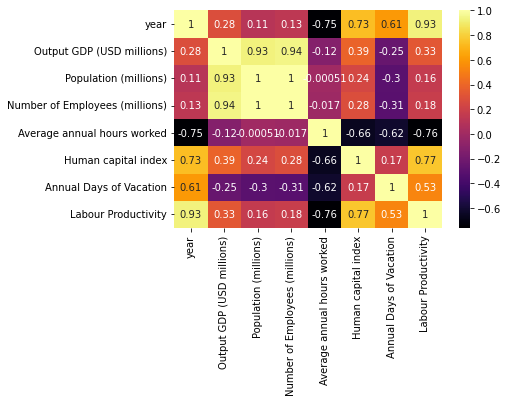

In [25]:
corr = d1_cleaned.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap= 'inferno')

The strong **positive** correlations (0.74<) in the data include: 

- Year and Labor Productivity
- Year and Human Capital Index 
- Output GDP and Number of Employees
- Output GDP and Population
- Number of Employees and Population
- Human capital index and Labor Productivity

The strong **negative** correlations (-0.74>) in the data include: 
- Average Annual Hours Worked and labor Productivity 
- Average Annual Hours Worked and Year


Great! As mentioned in the introduction, we were looking to find if variables have any significant impact and now we have 9 strong correlations, 3 of which have an impact on labor productivity. This is very useful for the analysis. 

##### **2. Pair-plot**

It would be beneficial to see values per country and how all variables compare and correlate. 

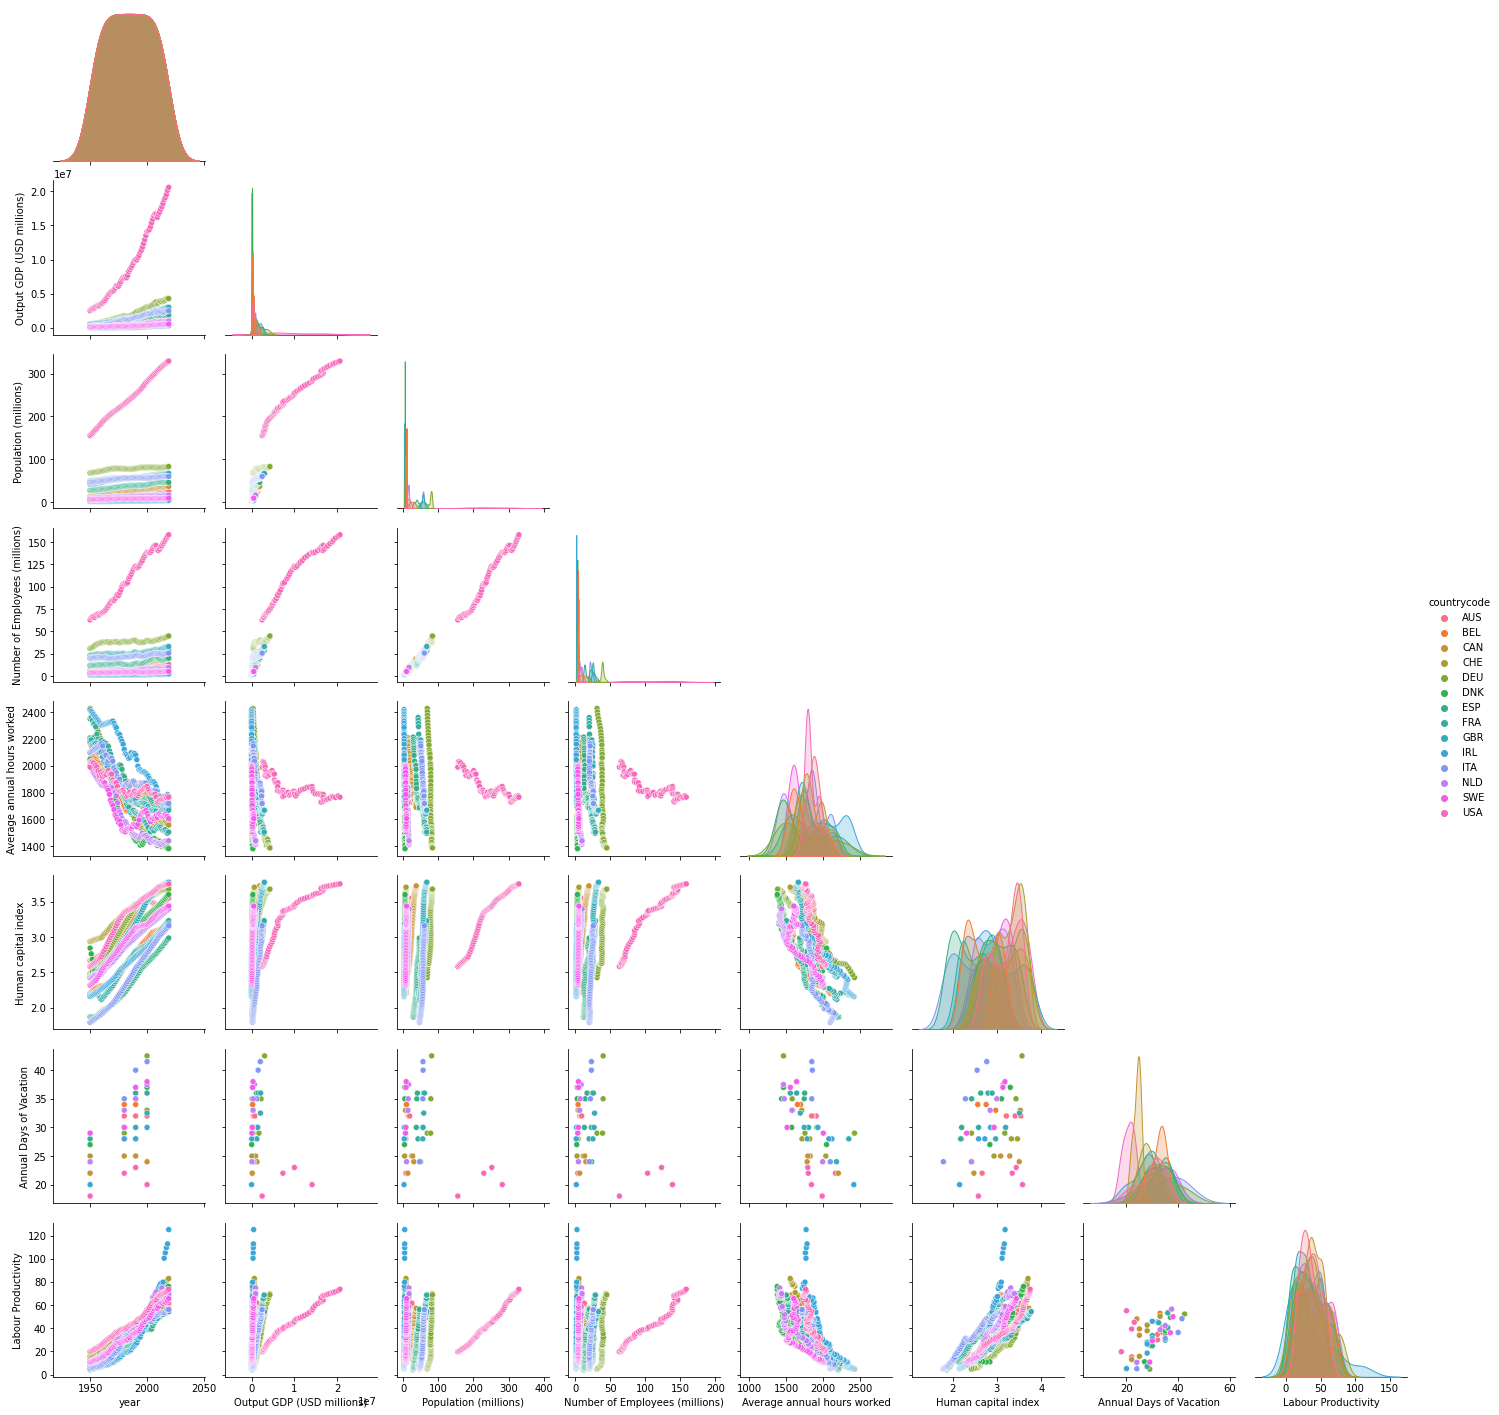

In [26]:
sns.pairplot(d1_cleaned, hue='countrycode', corner = True)

This graphs shows all variables compared to one another. 

From this visual, we can see that the United States (pink) is a significant outlier in the majority of the data which should be taken into consideration. An educated guess why the United States has greater values in most of the data is likely because of multiple factors such how it is a relatively new state, greater population, super power status, high immigration rates, and economic systems encouraging innovation.

# Part C: Method Chaining

The goal of method chaining is to condense my EDA and AP into a single function.

In [27]:
import project_functions3 as d3

# importing the .py file as project_functions3

In [28]:
clean = d3.load_and_process('../data/raw/pwt100.csv','../data/raw/days-of-vacation-and-holidays.csv')
clean

,countrycode,year,Output GDP (USD millions),Population (millions),Number of Employees (millions),Average annual hours worked,Human capital index,Annual Days of Vacation,Labour Productivity
0,AUS,1950,1.141236e+05,8.354106,3.429873,2170.923406,2.667302,22.0,15.326853
1,AUS,1951,1.105321e+05,8.599923,3.523916,2150.846928,2.674344,NaN,14.583223
2,AUS,1952,1.090251e+05,8.782430,3.591675,2130.956115,2.681403,NaN,14.244755
3,AUS,1953,1.228170e+05,8.950892,3.653409,2111.249251,2.688482,NaN,15.922848
4,AUS,1954,1.319214e+05,9.159148,3.731083,2091.724634,2.695580,NaN,16.903466
...,...,...,...,...,...,...,...,...,...
905,USA,2015,1.878536e+07,320.878310,150.248474,1770.023174,3.728116,NaN,70.636708
906,USA,2016,1.909520e+07,323.015995,152.396957,1766.744125,3.733411,NaN,70.920889
907,USA,2017,1.954298e+07,325.084756,154.672317,1763.726676,3.738714,NaN,71.638571
908,USA,2018,2.015526e+07,327.096265,156.675903,1774.703811,3.744024,NaN,72.487032


🎉🎉🎉

Now onto the analysis!

# Part D: Analysis 

At the beginning, I declared our research interest as to discover how productivity changes in specific countries and if selected variables have a significant impact on chosen countries. Additionally in my preliminary analysis, I assumed that the variables: years, annual hours worked, human capital index will have a positive correlation with productivity.

As I found out in my EDA, years and the human capital index was correctly predicted to have a positive correlation with productivity, where as annual hours worked had a negative correlation with productivity. Additionally, annual vacation days compared with productivity, contained interesting information. This will all be discussed in further detail below. 

**Human Capital Index**

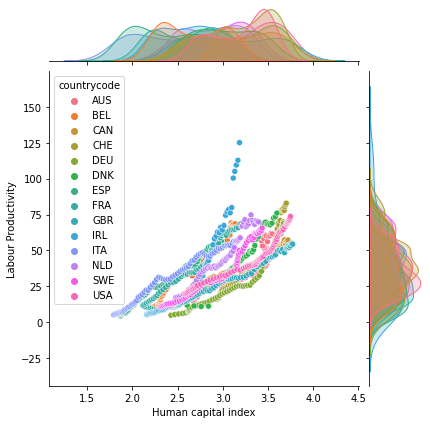

In [29]:
sns.jointplot(d1_cleaned, x = 'Human capital index', y = 'Labour Productivity', hue = 'countrycode')

This visual shows that labor Productivity and HCI have a strong positive correlation. Meaning that as the years have progressed in these countries, HCI has increased and Productivity has also increased. It is safe to assume that this is not a coincidence as HCI measures contributions to education and healthcare for the next generation of workers, therefore as there is more framework supporting workers, the more effective and efficient their input into the economy will be.

Information about the human capital index derived from this source: https://www.worldbank.org/en/publication/human-capital 

**Year**

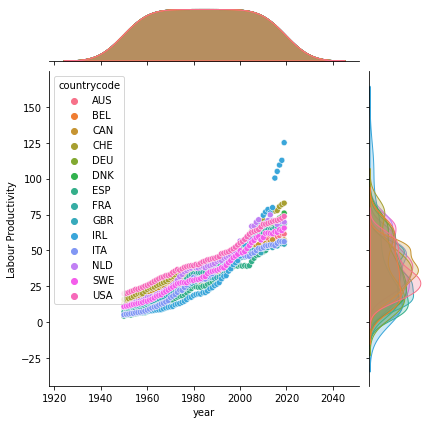

In [30]:
sns.jointplot(d1_cleaned, x = 'year', y = 'Labour Productivity',hue = 'countrycode')

This visual shows that labor Productivity and Year have a strong positive correlation. This is expected considering that the world has been becoming more and more advanced at an steady rate since the industrial revolution. This has meant that every year: commuting, machinery, communication and so on have become more efficient, and therefore, people have been able to be more productive.


**Average annual hours worked**

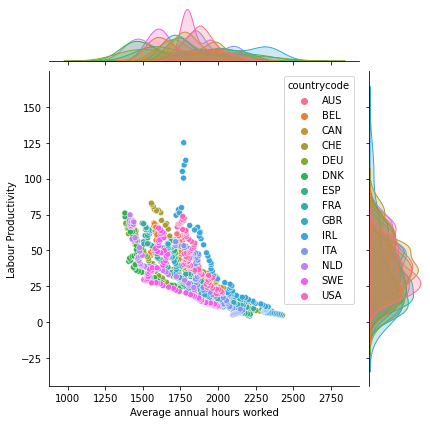

In [31]:
sns.jointplot(d1_cleaned, x = 'Average annual hours worked', y = 'Labour Productivity',hue = 'countrycode')

This visual shows that labor productivity and average annual hours worked have a strong negative correlation. This is unexpected considering that one would assume the higher the input, the higher the output. This can be explained by the burnout phenomenon, which is a state of physical and mental exhaustion that employees may experience by being overworked and this shows it is incredibly important for employers to give adequate rest time to their employees.


**Vacation Days**

I would like to visualize how vacation days and labor productivity correlate and to see if there is a optimal amount of rest time.

<AxesSubplot: xlabel='Annual Days of Vacation', ylabel='Labour Productivity'>

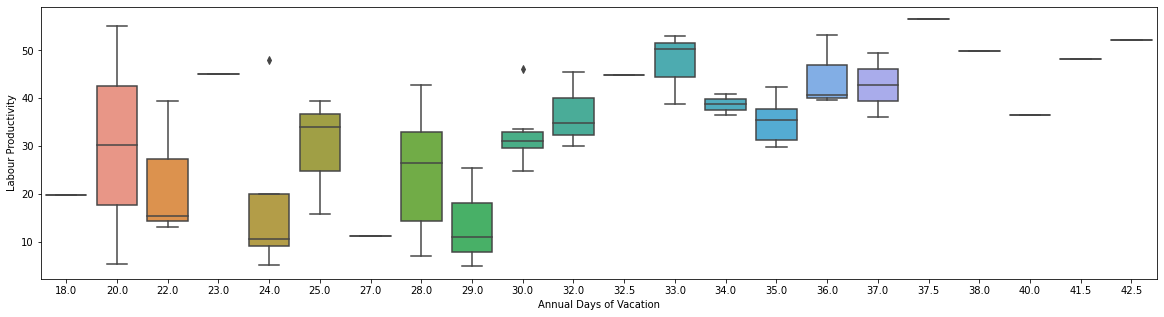

In [32]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Annual Days of Vacation', y='Labour Productivity', data = d1_cleaned)

It appears that the higher the annual days of vacation, the higher the average of labor productivity, especially from 30.0 annual days of vacation onward. 